In [1]:
#20BCE0969

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = datasets.load_iris()
X = df.data[:, :2]
y = df.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Train SVM models with different kernels
svm_models = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    svm_model = svm.SVC(kernel=kernel, gamma='scale')
    svm_model.fit(X_train, y_train)
    svm_models.append(svm_model)

In [5]:
#prediction

y_preds = []
for svm_model in svm_models:
    y_pred = svm_model.predict(X_test)
    y_preds.append(y_pred)

In [6]:
acc = []
for y_pred in y_preds:
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)

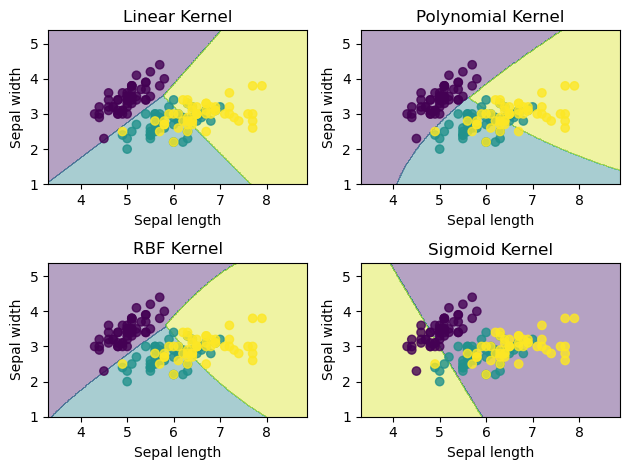

In [7]:
# Plotting

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
titles = ['Linear Kernel', 'Polynomial Kernel', 'RBF Kernel', 'Sigmoid Kernel']

for i, svm_model in enumerate(svm_models):
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.subplot(2, 2, i+1)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(titles[i])
plt.tight_layout()
plt.show()

In [8]:
#accuracy

for i, kernel in enumerate(kernels):
    print("Accuracy with", kernel, "kernel:", acc[i])

Accuracy with linear kernel: 0.8
Accuracy with poly kernel: 0.7333333333333333
Accuracy with rbf kernel: 0.8
Accuracy with sigmoid kernel: 0.28888888888888886
